In [1]:
# Importing Modules Required
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# Ascessing The Data
match= pd.read_csv("matches.csv")           
delivery= pd.read_csv("deliveries.csv")

In [5]:
merge=delivery.merge(match,right_on='id',left_on='match_id')    # merging Both data to get a new dataFrame

In [6]:
merge.head(2)  # preview of data Containing Season , Bowler , Dismissal_kind ....etc

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


# qtn1

In [7]:
# qtn1  :

## ### masking
mask1=merge['dismissal_kind']!= ('obstructing the field' and'run out')  # mask1 Not Having OTF and Run Out categorical data
mask2=merge['dismissal_kind'].notnull()                # Mask2  using attribute .notNUll( ) RETURNS data FALSE if
frame =merge[ mask1&mask2]                             # Contains Nan in That column vice -versa
frame.loc[:,'dismissal_kind']=1                        # changing Categorical data to Integer # easier for converting in dataFrame using .sum()
grp_frame=frame.groupby(['season','bowler'])             #Grouping 
da = grp_frame['dismissal_kind'].sum()                                  
grp_d=(da.reset_index()).sort_values('dismissal_kind',ascending=False)  #changing into dataFrame && sorting

grp_d.drop_duplicates('season',inplace=True)             # getting only first occurence columns
grp_d.sort_values('season',inplace=True)                       #sorting 
grp_d.reset_index(drop=True)                           #reseting index 

E:\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,season,bowler,dismissal_kind
0,2008,Sohail Tanvir,22
1,2009,RP Singh,23
2,2010,PP Ojha,21
3,2011,SL Malinga,28
4,2012,M Morkel,25
5,2013,DJ Bravo,32
6,2014,MM Sharma,23
7,2015,DJ Bravo,26
8,2016,B Kumar,23
9,2017,B Kumar,26


# qtn2

In [8]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Top 10 Batsman ON TOtal Run

In [9]:
frame2= delivery.groupby('batsman')      # grouping on Batsman
data_f2 = ((frame2['total_runs'].sum()).reset_index()).sort_values('total_runs',ascending=False)    # fetching Totals run colmn ,ADDing Then Reset index for sorting
data_f2.reset_index(drop=True,inplace=True)   
Top_batsman =data_f2.head(10)   # fetching Top 10
Top_batsman

,batsman,total_runs
0,SK Raina,4745
1,V Kohli,4588
2,G Gambhir,4388
3,RG Sharma,4334
4,DA Warner,4213
5,RV Uthappa,4004
6,CH Gayle,3914
7,S Dhawan,3754
8,MS Dhoni,3728
9,AB de Villiers,3621


Top 10 Bowler ON Total wickets

In [10]:

## ### masking
mask1=merge['dismissal_kind']!= ('obstructing the field' and'run out')  # mask1 Not Having OTF and Run Out categorical data
mask2=merge['dismissal_kind'].notnull()                # Mask2  using attribute .notNUll( ) RETURNS data FALSE if
frame =merge[ mask1&mask2]                             # Contains Nan in That column vice -versa
frame.loc[:,'dismissal_kind']=1                        # changing Categorical data to Integer # easier for converting in dataFrame using .s

frame3 = frame.groupby('bowler')
sub_f3=((frame3['dismissal_kind'].sum()).reset_index()).sort_values('dismissal_kind',ascending=False)
Top_bowler=sub_f3.head(10)            #fetching Top 10
Top_bowler.reset_index(drop=True,inplace=True)        #Reset Index 
Top_bowler

,bowler,dismissal_kind
0,SL Malinga,154
1,A Mishra,134
2,Harbhajan Singh,127
3,PP Chawla,126
4,DJ Bravo,122
5,B Kumar,111
6,A Nehra,106
7,Z Khan,103
8,R Vinay Kumar,103
9,R Ashwin,100


heatmap

In [71]:
#Concat.. Two dataFrames i.e; TOP_batsman(Batsman) & TOP _( Bowler )

frames=[Top_batsman,Top_bowler]                  
result=pd.concat(frames,axis=1)           # default Values of axis=0 ,we have to change it to 1 to get a new DataFrame

In [72]:
result       # Topper's DataFrame

,batsman,total_runs,bowler,dismissal_kind
0,SK Raina,4745,SL Malinga,154
1,V Kohli,4588,A Mishra,134
2,G Gambhir,4388,Harbhajan Singh,127
3,RG Sharma,4334,PP Chawla,126
4,DA Warner,4213,DJ Bravo,122
5,RV Uthappa,4004,B Kumar,111
6,CH Gayle,3914,A Nehra,106
7,S Dhawan,3754,Z Khan,103
8,MS Dhoni,3728,R Vinay Kumar,103
9,AB de Villiers,3621,R Ashwin,100


In [73]:
# making PIVOT TABLE
Table=result.pivot_table(index='bowler',columns='batsman',values='total_runs') 
Table

batsman,AB de Villiers,CH Gayle,DA Warner,G Gambhir,MS Dhoni,RG Sharma,RV Uthappa,S Dhawan,SK Raina,V Kohli
bowler,,,,,,,,,,
A Mishra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4588.0
A Nehra,NaN,3914.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
B Kumar,NaN,NaN,NaN,NaN,NaN,NaN,4004.0,NaN,NaN,NaN
DJ Bravo,NaN,NaN,4213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Harbhajan Singh,NaN,NaN,NaN,4388.0,NaN,NaN,NaN,NaN,NaN,NaN
PP Chawla,NaN,NaN,NaN,NaN,NaN,4334.0,NaN,NaN,NaN,NaN
R Ashwin,3621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
R Vinay Kumar,NaN,NaN,NaN,NaN,3728.0,NaN,NaN,NaN,NaN,NaN
SL Malinga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4745.0,NaN


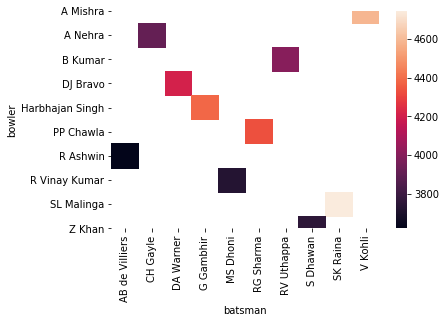

In [74]:
sns.heatmap(Table)         # PLOTTING GRAPH